In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [5]:
path='dataset/'
data = pd.read_csv(path+'household_power_consumption.txt',sep=';',
                  parse_dates=True,
                  low_memory=False)

In [6]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [8]:
data['date_time'] = data['Date'].str.cat(data['Time'],sep=' ')
data.drop(['Date','Time'],inplace=True,axis=1)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [9]:
data.set_index(['date_time'],inplace=True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
16/12/2006 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
16/12/2006 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
16/12/2006 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
16/12/2006 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [11]:
data.replace('?',nan,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [12]:
data = data.astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7+ MB


In [13]:
np.isnan(data).sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [14]:
def fill_missing(data):
    one_day = 24*60
    for row in range(data.shape[0]):
        for col in range(data.shape[1]):
            if np.isnan(data[row,col]):
                data[row,col] = data[row-one_day,col]

In [19]:
fill_missing(data.values)
np.isnan(data).sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [17]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.089418e+00,1.236871e-01,2.408364e+02,4.618401e+00,1.118474e+00,1.291131e+00,6.448635e+00
std,1.054678e+00,1.125933e-01,3.240051e+00,4.433165e+00,6.141460e+00,5.796922e+00,8.433584e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.526000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [18]:
data.shape

(2075259, 7)

In [20]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
16/12/2006 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
16/12/2006 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
16/12/2006 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
16/12/2006 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


## Prepare power consumption for each day

In [24]:
data.to_csv(path+'cleaned_data.csv')

In [27]:
dataset=pd.read_csv(path+'cleaned_data.csv',sep=',',parse_dates=True,index_col='date_time',low_memory=False)

In [28]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### Let's do EDA

In [29]:
data = dataset.resample('D').sum()

In [30]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


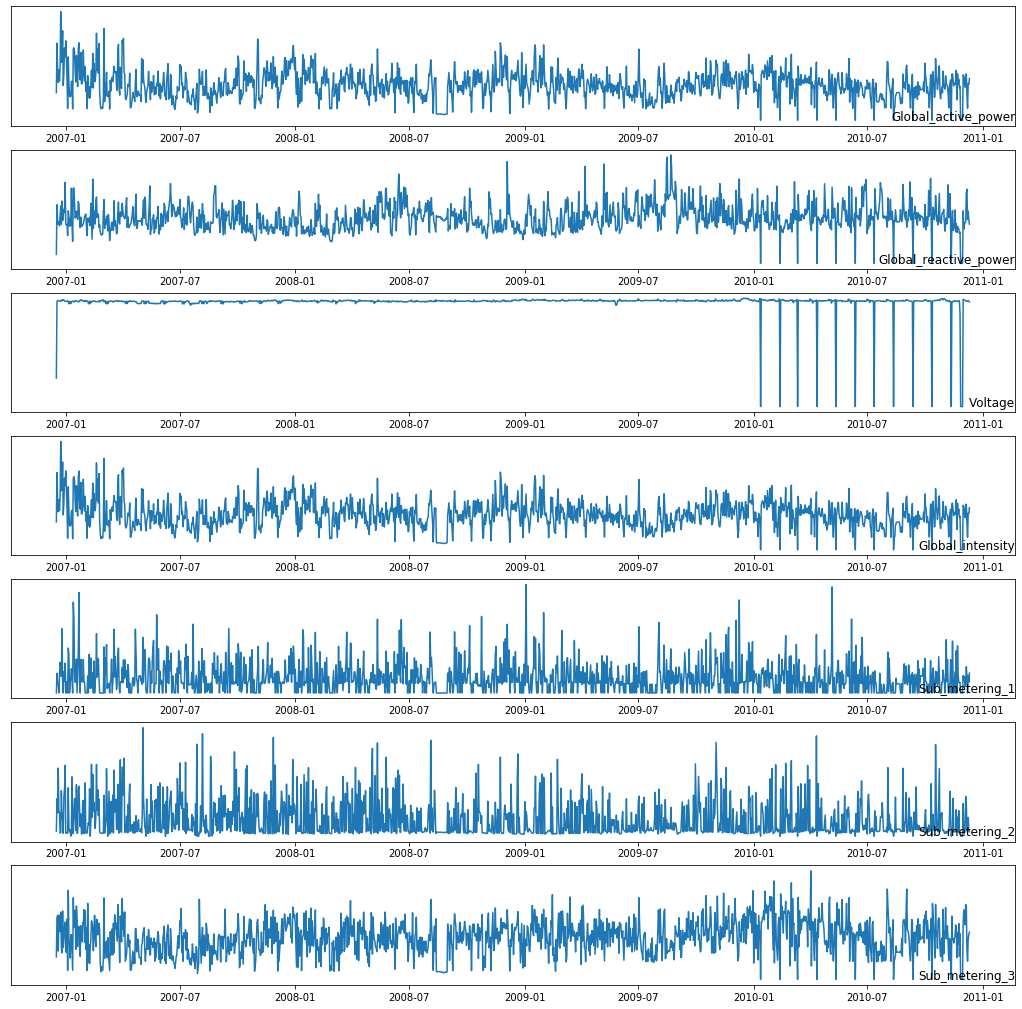

In [37]:
fig = plt.figure(figsize=(18,18))

for i in range(len(data.columns)):
    plt.subplot(len(data.columns),1,i+1)
    name = data.columns[i]
    plt.plot(data[name])
    plt.title(name,y=0,loc='right')
    plt.yticks([])
plt.show()
fig.tight_layout()

### Exploring Active Power consumption for each year

In [42]:
data['2006']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
2006-12-21,1723.288,144.434,347096.41,7266.4,1765.0,2692.0,10456.0
2006-12-22,2341.338,186.906,347305.75,9897.0,3151.0,350.0,11131.0
2006-12-23,4773.386,221.470,345795.95,20200.4,2669.0,425.0,14726.0
2006-12-24,2550.012,149.900,348029.91,11002.2,1703.0,5082.0,6891.0


In [39]:
years = ['2007','2008','2009','2010']

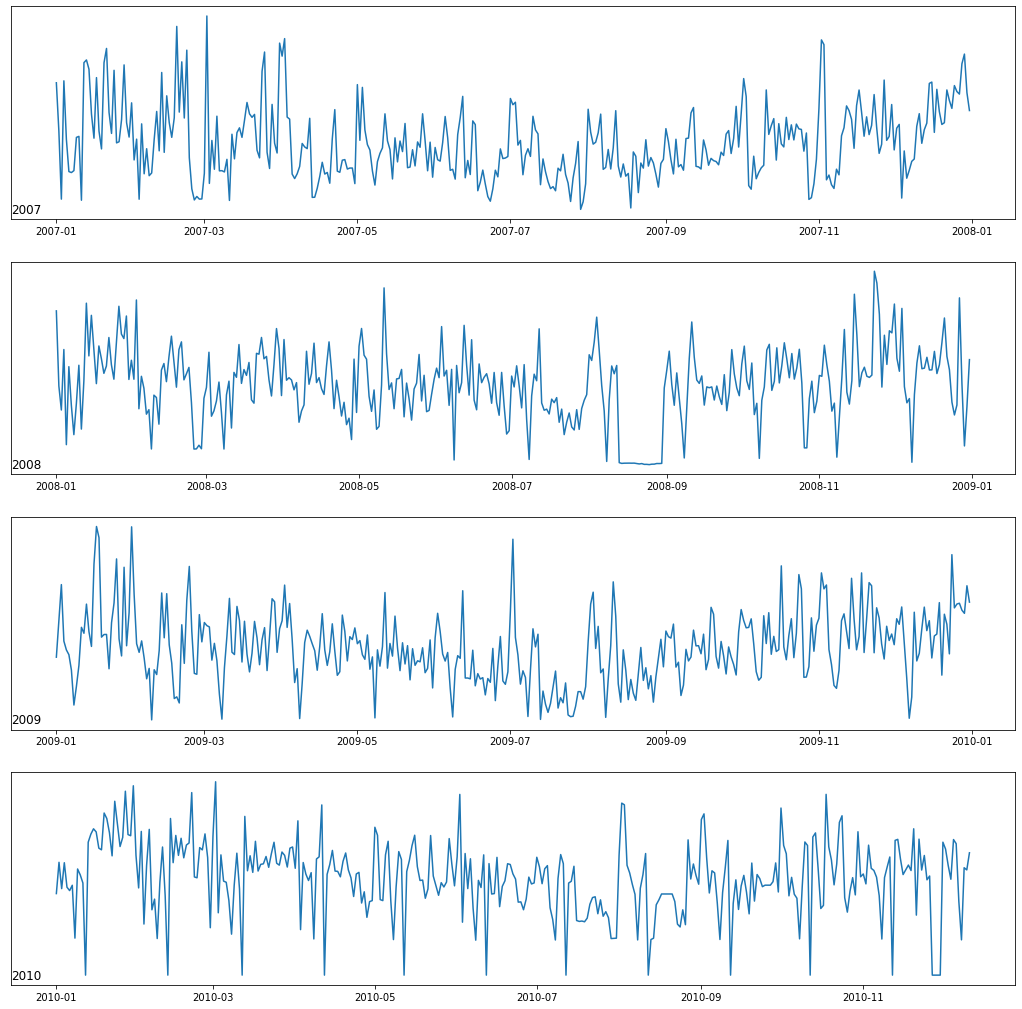

In [40]:
fig = plt.figure(figsize=(18,18))

for i in range(len(years)):
    plt.subplot(len(years),1,i+1)
    year = years[i]
    active_power_data = data[str(year)]
    plt.plot(active_power_data['Global_active_power'])
    plt.title(str(year),y=0,loc='left')
    plt.yticks([])
plt.show()
fig.tight_layout()

### Power consumption distribution with histogram

In [ ]:
# for active power

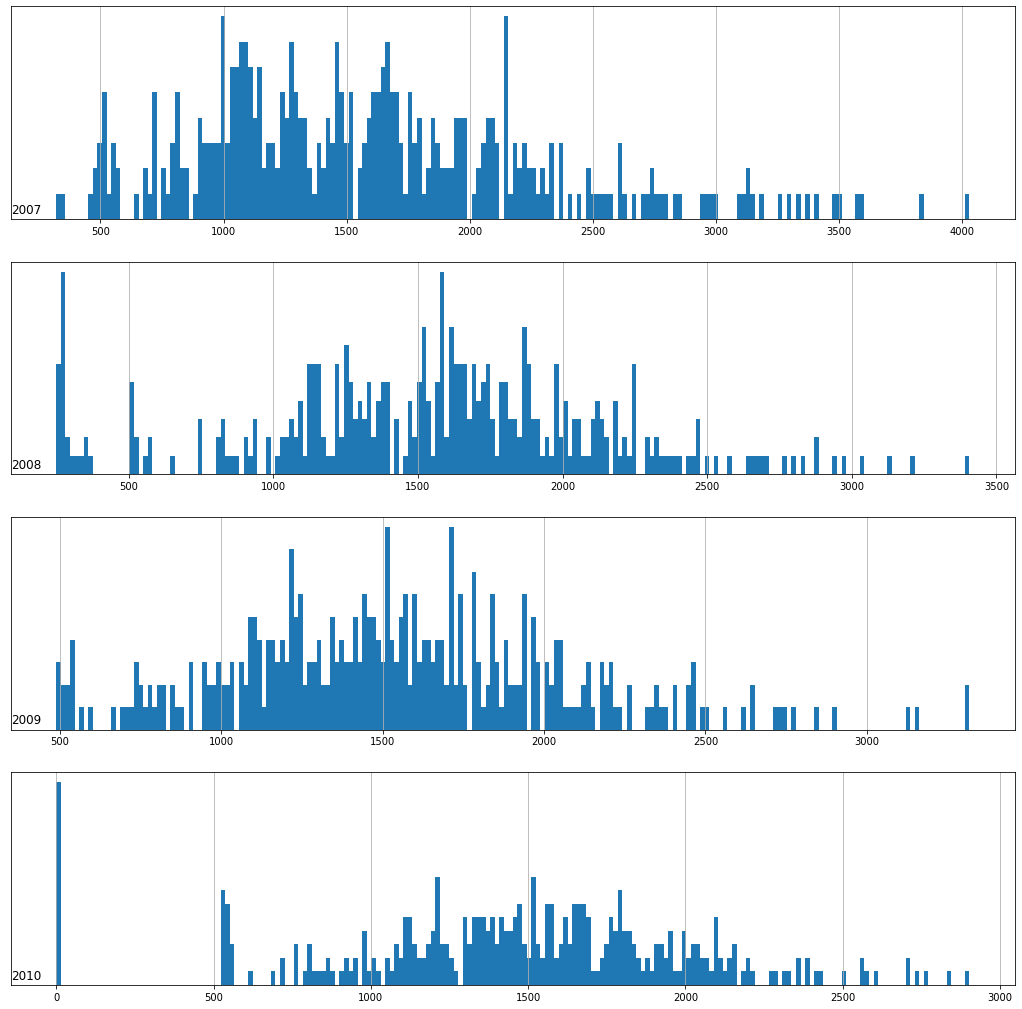

In [41]:
fig = plt.figure(figsize=(18,18))

for i in range(len(years)):
    plt.subplot(len(years),1,i+1)
    year = years[i]
    active_power_data = data[str(year)]
    active_power_data['Global_active_power'].hist(bins=200)
    plt.title(str(year),y=0,loc='left')
    plt.yticks([])
plt.show()
fig.tight_layout()

In [43]:
# for full data

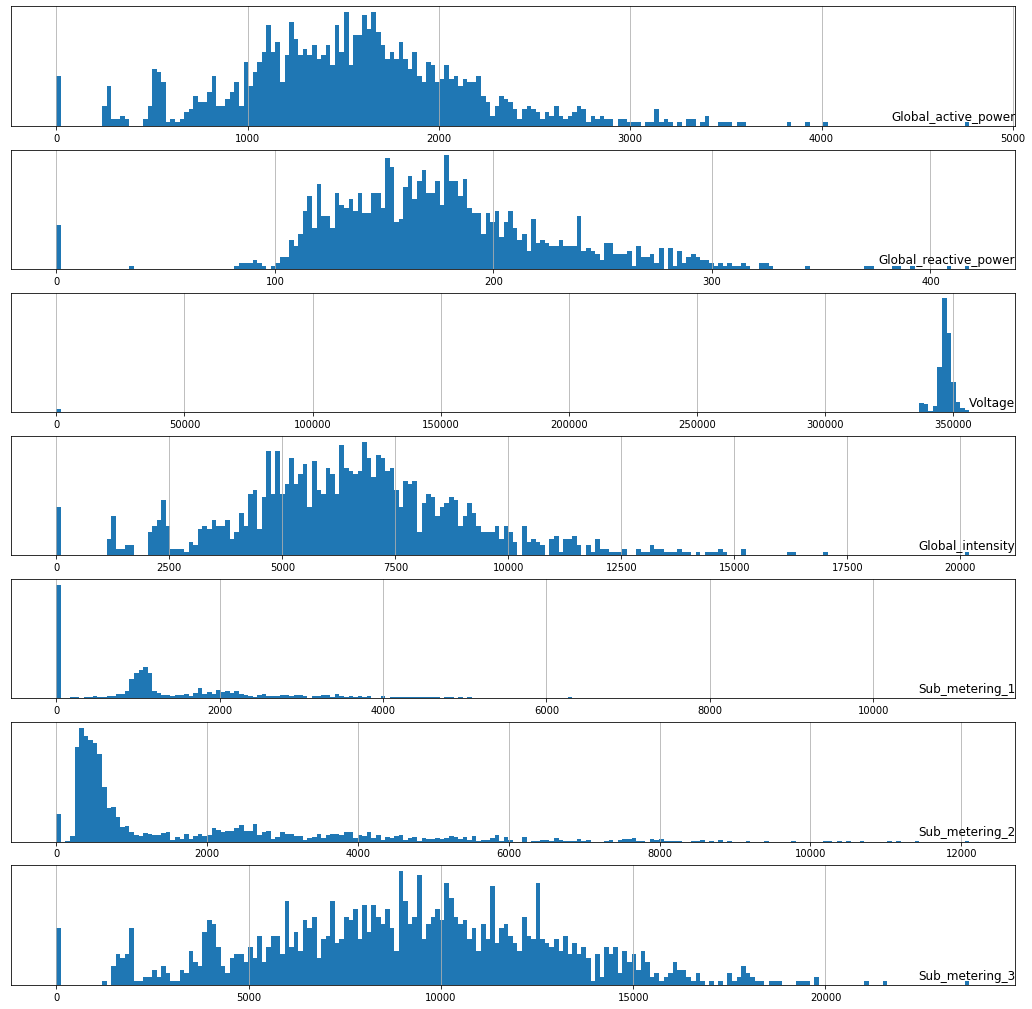

In [44]:
fig = plt.figure(figsize=(18,18))

for i in range(len(data.columns)):
    plt.subplot(len(data.columns),1,i+1)
    name = data.columns[i]
    data[name].hist(bins=200)
    plt.title(name,y=0,loc='right')
    plt.yticks([])
plt.show()
fig.tight_layout()

#### plot power consumption hist for each month of 2007

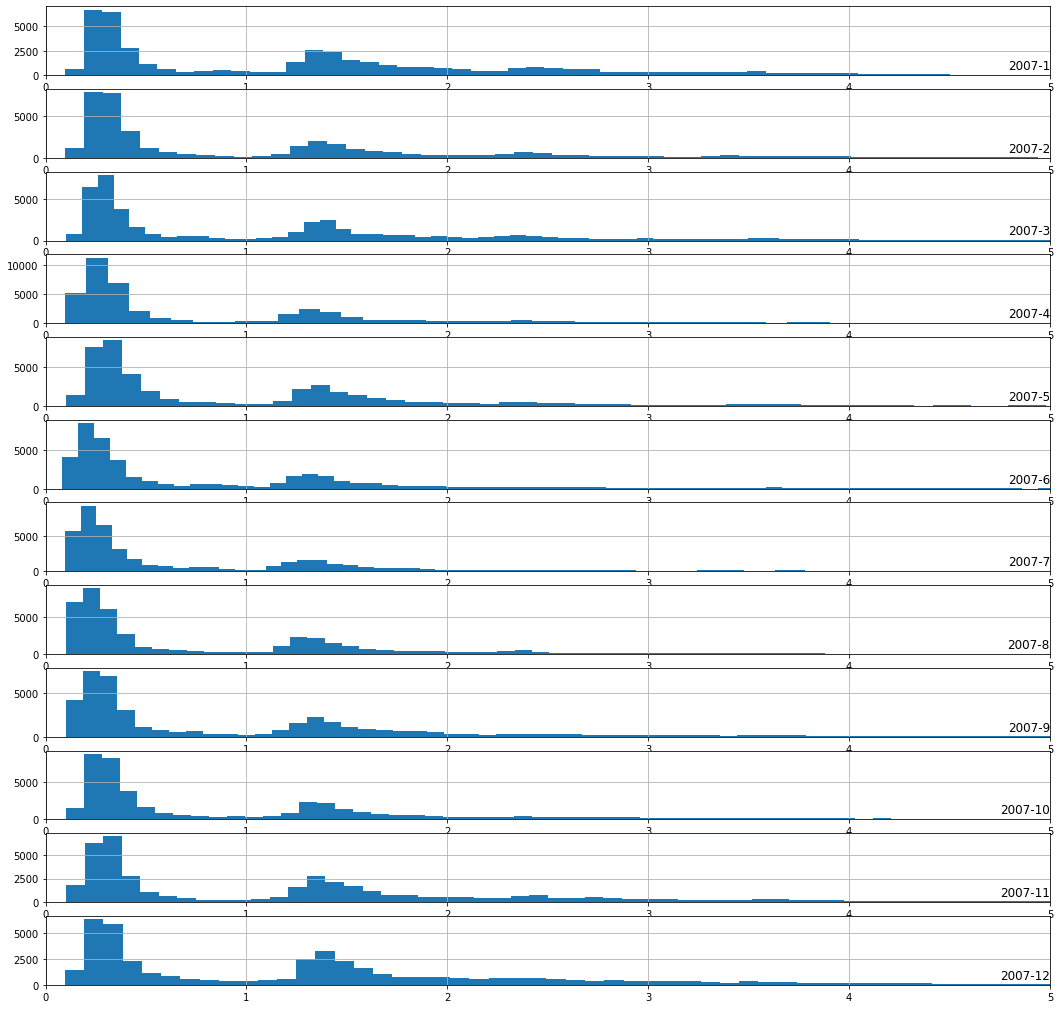

In [49]:
months = [i for i in range(1,13)]

fig = plt.figure(figsize=(18,18))

for i in range(len(months)):
    ax = plt.subplot(len(months),1,i+1)
    month = '2007-'+str(months[i])
    active_power_data = dataset[month]
    active_power_data['Global_active_power'].hist(bins=100)
    ax.set_xlim(0,5)
    plt.title(month,y=0,loc='right')
plt.show()
fig.tight_layout()

## Prediction Model

In [50]:
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
2010-12-10,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0
2010-12-11,1836.822,151.144,343926.57,7826.2,2054.0,489.0,10308.0


In [51]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,1551.697967,176.172177,343032.233082,6578.159643,1593.084420,1839.005491,9185.029513
std,614.949776,51.844721,35759.251700,2549.274088,1581.929433,2082.860776,3774.129939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1162.226000,141.914000,345672.700000,5005.000000,582.000000,429.000000,6605.000000
50%,1534.652000,170.396000,346958.950000,6508.000000,1111.000000,683.000000,9230.000000
75%,1890.472000,202.392000,348264.250000,7953.400000,2196.000000,2711.000000,11716.000000
max,4773.386000,417.834000,356306.410000,20200.400000,11178.000000,12109.000000,23743.000000


In [54]:
data_train = data.loc[:'2009-12-31','Global_active_power']
data_train.tail()

date_time
2009-12-27    2195.452
2009-12-28    2094.098
2009-12-29    2047.968
2009-12-30    2451.110
2009-12-31    2211.892
Freq: D, Name: Global_active_power, dtype: float64

In [56]:
data_test = data.loc['2010','Global_active_power']
data_test.head()

date_time
2010-01-01    1224.252
2010-01-02    1693.778
2010-01-03    1298.728
2010-01-04    1687.440
2010-01-05    1320.158
Freq: D, Name: Global_active_power, dtype: float64

In [57]:
data_train.shape

(1112,)

In [58]:
data_test.shape

(345,)

### Prepare training data

In [59]:
data_train.head(14)

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
2006-12-21    1723.288
2006-12-22    2341.338
2006-12-23    4773.386
2006-12-24    2550.012
2006-12-25    2743.120
2006-12-26    3934.110
2006-12-27    1528.760
2006-12-28    2072.638
2006-12-29    3174.392
Freq: D, Name: Global_active_power, dtype: float64

In [60]:
data_train = np.array(data_train)

In [71]:
X_train,Y_train = [],[]

for i in range(7,len(data_train)-7):
    X_train.append(data_train[i-7:i])
    Y_train.append(data_train[i:i+7])


In [72]:
X_train,Y_train = np.array(X_train),np.array(Y_train)

In [73]:
X_train.shape,Y_train.shape

((1098, 7), (1098, 7))

In [75]:
pd.DataFrame(Y_train)

,0,1,2,3,4,5,6
0,4773.386,2550.012,2743.120,3934.110,1528.760,2072.638,3174.392
1,2550.012,2743.120,3934.110,1528.760,2072.638,3174.392,2796.108
2,2743.120,3934.110,1528.760,2072.638,3174.392,2796.108,3494.196
3,3934.110,1528.760,2072.638,3174.392,2796.108,3494.196,2749.004
4,1528.760,2072.638,3174.392,2796.108,3494.196,2749.004,1824.760
...,...,...,...,...,...,...,...
1093,1144.166,2034.966,1888.022,1455.200,2905.894,2127.648,2183.618
1094,2034.966,1888.022,1455.200,2905.894,2127.648,2183.618,2195.452
1095,1888.022,1455.200,2905.894,2127.648,2183.618,2195.452,2094.098
1096,1455.200,2905.894,2127.648,2183.618,2195.452,2094.098,2047.968


In [76]:
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)

In [77]:
y_scaler = MinMaxScaler()
Y_train = y_scaler.fit_transform(Y_train)

In [78]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6
0,0.211996,0.694252,0.431901,0.313037,0.436748,0.325660,0.462304
1,0.694252,0.431901,0.313037,0.436748,0.325660,0.462304,1.000000
2,0.431901,0.313037,0.436748,0.325660,0.462304,1.000000,0.508439
3,0.313037,0.436748,0.325660,0.462304,1.000000,0.508439,0.551133
4,0.436748,0.325660,0.462304,1.000000,0.508439,0.551133,0.814446


In [79]:
X_train = X_train.reshape(1098,7,1)

In [80]:
X_train.shape

(1098, 7, 1)

### Build LSTM Model

In [83]:
reg = Sequential()
reg.add(LSTM(units=200, activation='relu',input_shape=(7,1)))
reg.add(Dense(7))

In [84]:
reg.compile(loss='mse',optimizer='adam')

In [85]:
reg.fit(X_train,Y_train,epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0626
Epoch 2/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0246
Epoch 3/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0241
Epoch 4/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0240
Epoch 5/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0240
Epoch 6/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0243
Epoch 7/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0240
Epoch 8/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0239
Epoch 9/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0240
Epoch 10/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0238
Epoch 11/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0239
Epoch 12/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0237
Epoch 13/100
35/35 [=====

35/35 [==============================] - 1s 22ms/step - loss: 0.0229


### Prepare test dataset and test LSTM Model

In [89]:
X_test,Y_test = [],[]

for i  in range(7,len(data_test)-7):
    X_test.append(data_test[i-7:i])
    Y_test.append(data_test[i:i+7])


In [90]:
X_test,Y_test = np.array(X_test),np.array(Y_test)

In [91]:
X_test.shape,Y_test.shape

((331, 7), (331, 7))

In [92]:
X_test = x_scaler.transform(X_test)
Y_test = y_scaler.transform(Y_test)

In [93]:
X_test = X_test.reshape(331,7,1)
X_test.shape

(331, 7, 1)

In [94]:
Y_pred = reg.predict(X_test)

In [95]:
Y_pred = y_scaler.inverse_transform(Y_pred)

In [96]:
Y_pred

array([[1539.8254 , 1487.7744 , 1472.1233 , ..., 1624.7687 , 1579.7596 ,
        1638.0359 ],
       [1165.2517 , 1287.7538 , 1336.5958 , ..., 1580.3385 , 1543.061  ,
        1570.7482 ],
       [1596.6774 , 1506.4266 , 1499.8258 , ..., 1586.9385 , 1530.0981 ,
        1607.3147 ],
       ...,
       [1418.9381 , 1085.992  , 1129.2896 , ..., 1160.8456 , 1000.11163,
        1143.7622 ],
       [1802.5386 , 1414.3799 , 1339.0625 , ..., 1194.1527 , 1087.9137 ,
        1324.7233 ],
       [1780.6841 , 1426.8711 , 1334.3657 , ..., 1226.5488 , 1176.1346 ,
        1412.2649 ]], dtype=float32)

In [97]:
Y_true = y_scaler.inverse_transform(Y_test)
Y_true

array([[ 555.664, 1593.318, 1504.82 , ...,    0.   , 1995.796, 2116.224],
       [1593.318, 1504.82 , 1383.18 , ..., 1995.796, 2116.224, 2196.76 ],
       [1504.82 , 1383.18 ,    0.   , ..., 2116.224, 2196.76 , 2150.112],
       ...,
       [1892.998, 1645.424, 1439.426, ..., 1973.382, 1109.574,  529.698],
       [1645.424, 1439.426, 2035.418, ..., 1109.574,  529.698, 1612.092],
       [1439.426, 2035.418, 1973.382, ...,  529.698, 1612.092, 1579.692]])

### Evaluate the model

In [98]:
def evaluate_model(y_true,y_pred):
    scores = []
    
    #calculate scores for each day
    for i in range(y_true.shape[1]):
        mse = mean_squared_error(y_true[:,i],y_pred[:,i])
        rmse = np.sqrt(mse)
        scores.append(rmse)
    
    #calculate score for whole prediction
    total_score = 0
    for row in range(y_true.shape[0]):
        for col in range(y_pred.shape[1]):
            total_score = total_score + (y_true[row,col]-y_pred[row,col])**2
    total_score = np.sqrt(total_score/(y_true.shape[0]*y_pred.shape[1]))
    
    return total_score,scores

In [99]:
evaluate_model(Y_true,Y_pred)

(589.1796993146221,
 [604.0203487985291,
  593.2474389484739,
  570.1808639437095,
  587.1297181975808,
  590.9632928340625,
  579.7682904758235,
  598.2888209658934])

In [101]:
np.std(Y_true[0])

710.0253857243853

In [106]:
Y_true.shape

(331, 7)

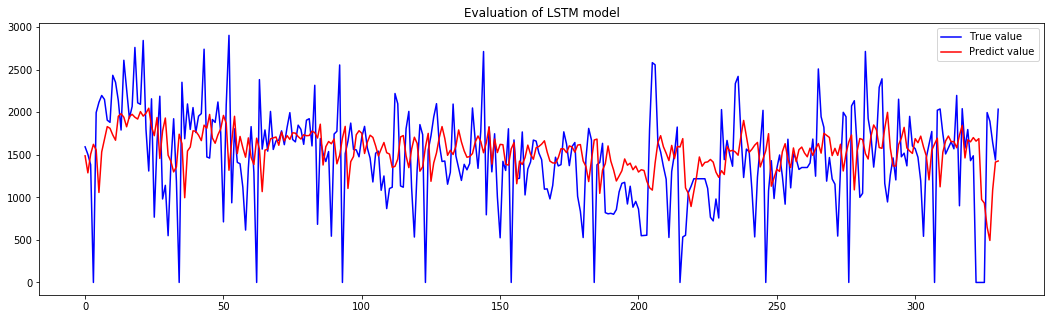

In [113]:
fig = plt.figure(figsize=(18,35))

plt.plot(Y_true[:,1],color='b',label='True value')
plt.plot(Y_pred[:,1],color='r',label='Predict value')
plt.title('Evaluation of LSTM model')
plt.legend()
plt.show()

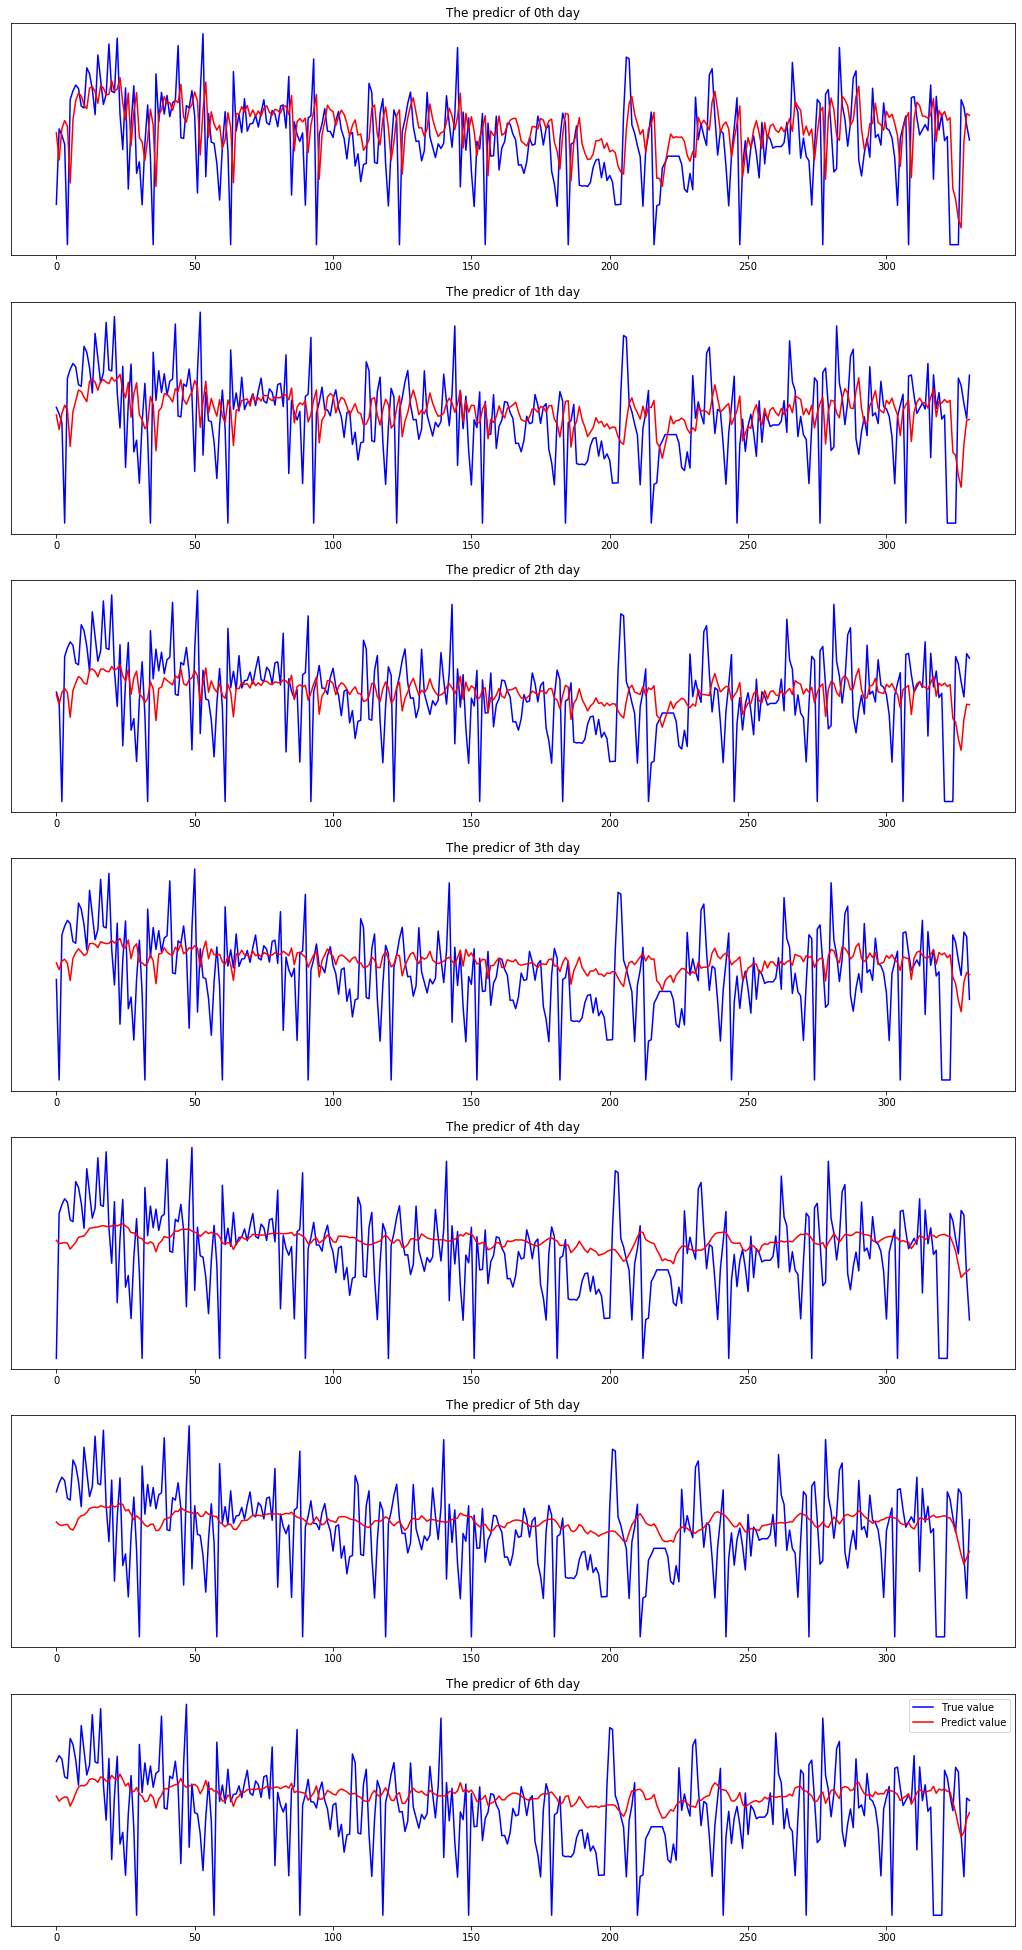

In [114]:
fig = plt.figure(figsize=(18,35))

for i in range(Y_true.shape[1]):
    plt.subplot(Y_true.shape[1],1,i+1)
    plt.plot(Y_true[:,i],color='b',label='True value')
    plt.plot(Y_pred[:,i],color='r',label='Predict value')
    plt.title('The predicr of '+str(i)+'th day',loc='center')
    plt.yticks([])

plt.legend()
plt.show()
fig.tight_layout()